Házi feladat 01 - GTHT0A - Vitálos Tünde Eszter

Elsőként a rendelések sorszámát tartalmazó oszlopot vizsgálom, hiszen ez a tábla kulcsa, szerintem ezt a legfontosabb feltérképezni.

A tábla 28085 sort tartalmaz, látszólag egyesével növekszik, de a hibák elkerülése érdekében ellenőrzöm.

NULL értéket nem tartalmaz, ez az első, amit viszgáltam.

A minimum és a maximum érték is stimmel, de amennyiben vannak duplikált elemek az oszlopban, lehet, hogy valamelyik sorszámú rendelés hiányzik.

Mivel az1-től 28085-ig tartó intervallumban mind a 28085 érték egyedi, ezért biztos, hogy az összes sorszám megvan.

In [ ]:
---Null érték keresése

SELECT Típus,
    COUNT(*) Darab
FROM 
    (SELECT 
        CASE WHEN SORSZAM IS NULL THEN 'Null'
            ELSE 'Nem Null' 
            END AS Típus
        FROM Rendeles) rows
GROUP BY Típus

In [ ]:
--- Minimum és maximum értékek keresése

SELECT MIN(SORSZAM) AS 'Minimum_érték', 
       MAX(SORSZAM) AS 'Maximum_érték'
FROM Rendeles

In [ ]:
--- Egyedi értékek keresése

SELECT COUNT(DISTINCT SORSZAM) AS 'Egyedi_sorszámok_száma'
FROM Rendeles

Másodszor a rendelések dátumát fogom vizsgálni, hiszen később fontos szűrési feltétel lehet, hasznos elemzéseket készíthetünk a segítségével.

Először azt vizsgálom, mennyi NULL érték van benne, de látom, hogy egy sincs.

Megnézve, hogy melyik időszak adatait találjuk a táblában, rájövünk, hogy a REND\_DATUM oszlop majdnem 2 év adatait tárolja.

Ábrázoltam, hogy melyik hónapok szerepelnek leggyakrabban az oszlopban. Április azért kevesebb, mert az előbb megkapott intervallumban is látszik, hogy április elsejétől már nem jegyezték fel az adatokat, tehát míg a többi hónap két év adatait, az áprilisi csak egy év adatait tárolja.

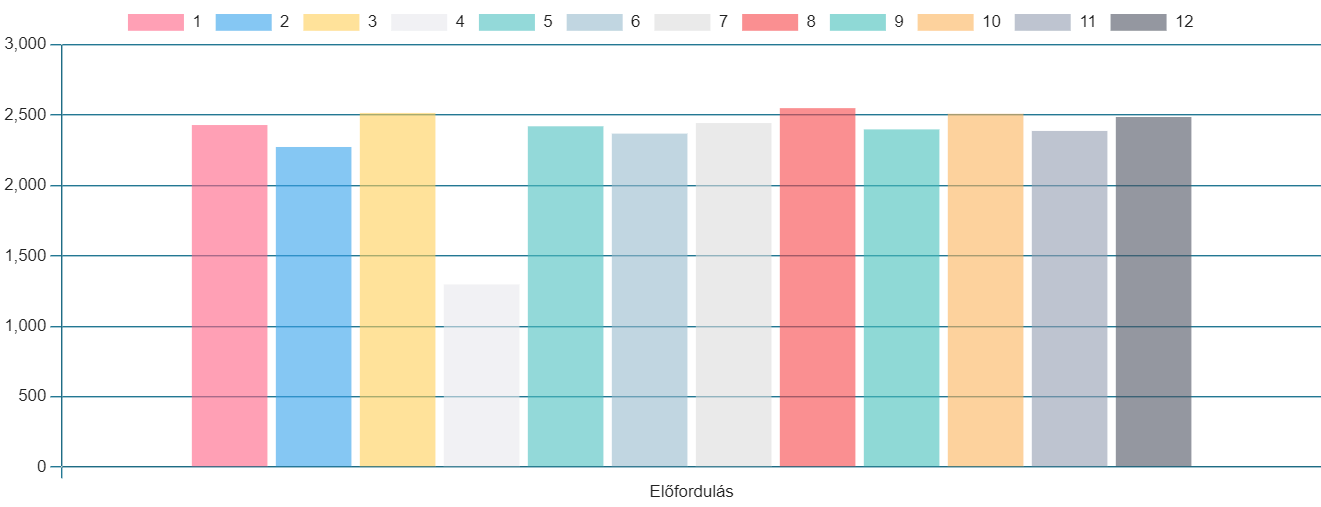

In [ ]:
--- NULL értékek keresése

SELECT Típus,
    COUNT(*) AS Darab
FROM 
    (SELECT 
        CASE WHEN REND_DATUM IS NULL THEN 'Null'
            ELSE 'Nem Null' 
            END AS Típus
        FROM Rendeles) rows
GROUP BY Típus

In [ ]:
--- Intervallum vizsgálata

SELECT MIN(REND_DATUM) AS 'Minimum_érték', 
       MAX(REND_DATUM) AS 'Maximum_érték'
FROM Rendeles

In [ ]:
--- Forgalom vizsgálata, ami nem része a házi feladatnak, csak szemet gyönyörködtetően néz ki még akkor is, ha adatelemzés.

SELECT IIF(GROUPING_ID(YEAR(REND_DATUM), MONTH(REND_DATUM)) = 3, 'ÖSSZESEN', CAST(YEAR(REND_DATUM) AS NVARCHAR)) AS 'ÉV',
       IIF(GROUPING_ID(YEAR(REND_DATUM), MONTH(REND_DATUM)) = 1 OR GROUPING_ID(YEAR(REND_DATUM), MONTH(REND_DATUM)) = 3, 'ÖSSZESEN', CAST(MONTH(REND_DATUM) AS NVARCHAR)) AS 'HÓNAP',
       COUNT(*) AS 'DB'
FROM Rendeles
GROUP BY ROLLUP(YEAR(REND_DATUM), MONTH(REND_DATUM))

In [ ]:
--- Leggyakrabban előforduló hónapok keresése

SELECT TOP 12
    MONTH(REND_DATUM) AS Hónap, 
    COUNT(*) AS Előfordulás
from Rendeles
GROUP BY MONTH(REND_DATUM)
ORDER BY MONTH(REND_DATUM) ASC

Utolsóként egy szöveges oszlopot, a szállítás módját vizsgálnám meg.

Először a nullértékek mennyiségét mérem fel, majd hogy mennyi különböző szállítási mód van listázva.

Megnézem a három különböző elem arányát.

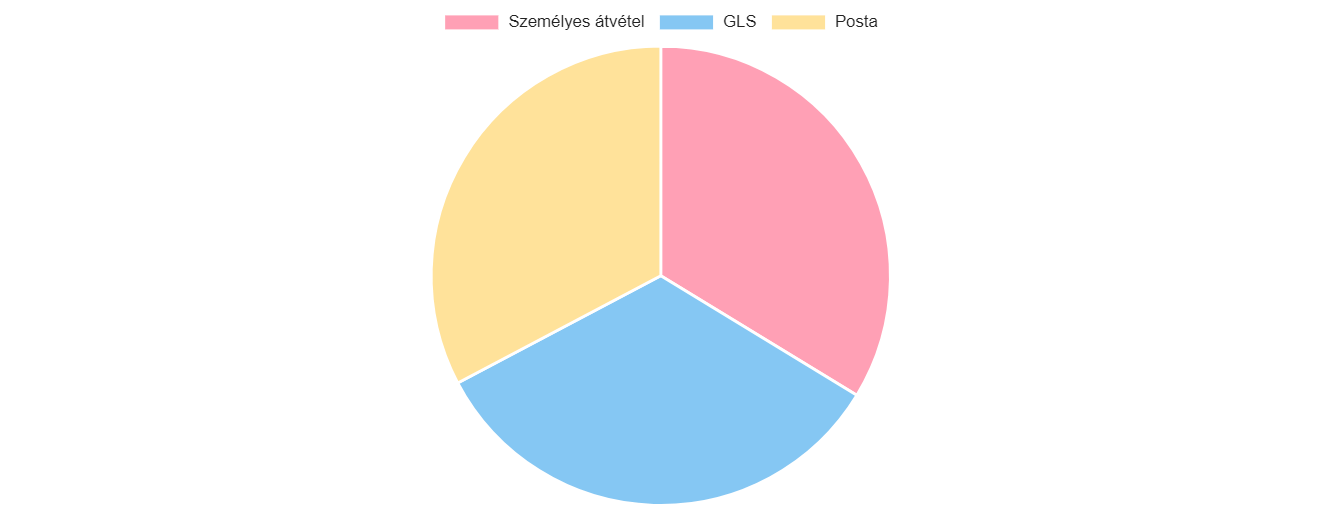

Nagyjából egyforma mértékben oszlanak el. A karakterhossz szerinti eloszlás nem meglepő módon ugyanilyen arányban van.

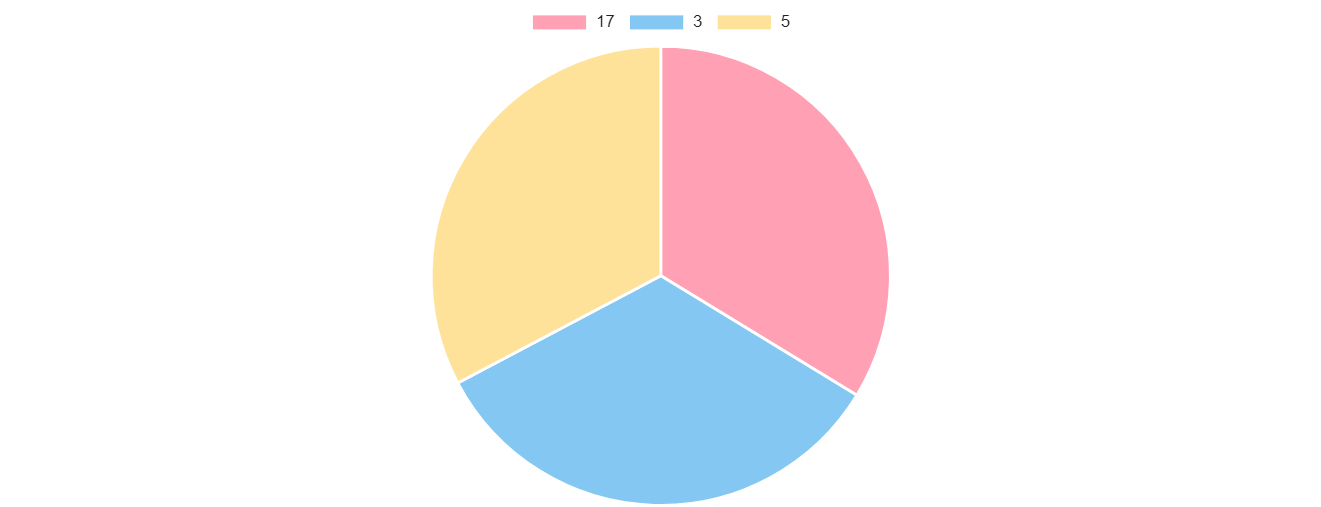  

A karakterhossz viszonylagosan magas szórása figyelmeztet arra, hogy amennyiben az oszlopban található adatokat meg szeretnénk jeleníteni, ki szeretnénk íratni, különös tekintettel kell lennünk arra, hogy biztosan minden karakter kiférjen, hiszen nagyon eltérő hosszúságúak, ezért meghatározom a minimum szükséges karakterhosszt az esetleges kiíratáshoz.

In [ ]:
--- NULL értékek keresése

SELECT Típus,
    COUNT(*) AS Darab
FROM 
    (SELECT 
        CASE WHEN SZALL_MOD IS NULL THEN 'Null'
            ELSE 'Nem Null' 
            END AS Típus
        FROM Rendeles) rows
GROUP BY Típus

In [ ]:
--- Egyedi értékek száma

SELECT COUNT(DISTINCT SZALL_MOD) AS Egyedi_értékek_száma
FROM Rendeles

In [ ]:
--- Különböző elemek aránya

SELECT TOP 3
    SZALL_MOD AS Mód, 
    COUNT(*) Előfordulás
from Rendeles
GROUP BY SZALL_MOD
ORDER BY COUNT(*) DESC

In [ ]:
--- Karakterhossz szerinti eloszlás

SELECT LEN(SZALL_MOD) AS Hossz,
       count(*) AS Mennyiség
FROM Rendeles
GROUP BY LEN(SZALL_MOD)
ORDER BY 2 DESC

In [63]:
--- Szórás és maximum karakterhossz

SELECT MAX(LEN(SZALL_MOD)) AS Maximum, 
       STDEV(LEN(SZALL_MOD)) AS Szórás
FROM Rendeles

(1 row affected)

Total execution time: 00:00:00.033

Maximum,Szórás
17,"6,2051544053345635"
